### Notebook Imports and Packages

In [386]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map
from sympy import symbols, diff
import math

from sklearn.linear_model import LinearRegression

%matplotlib inline

## Example 1: A simple cost-function

### $$f(x) = x^2 + x + 1 $$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
x_1 = np.linspace(start = -3, stop = 3, num = 100)

In [4]:
y = list(map(f, x_1))

In [5]:
y_1 = np.array(y)

In [6]:
y_1

array([ 7.        ,  6.70064279,  6.40863177,  6.12396694,  5.8466483 ,
        5.57667585,  5.31404959,  5.05876951,  4.81083563,  4.57024793,
        4.33700643,  4.11111111,  3.89256198,  3.68135904,  3.4775023 ,
        3.28099174,  3.09182736,  2.91000918,  2.73553719,  2.56841139,
        2.40863177,  2.25619835,  2.11111111,  1.97337006,  1.84297521,
        1.71992654,  1.60422406,  1.49586777,  1.39485767,  1.30119376,
        1.21487603,  1.1359045 ,  1.06427916,  1.        ,  0.94306703,
        0.89348026,  0.85123967,  0.81634527,  0.78879706,  0.76859504,
        0.75573921,  0.75022957,  0.75206612,  0.76124885,  0.77777778,
        0.80165289,  0.8328742 ,  0.87144169,  0.91735537,  0.97061524,
        1.0312213 ,  1.09917355,  1.17447199,  1.25711662,  1.34710744,
        1.44444444,  1.54912764,  1.66115702,  1.7805326 ,  1.90725436,
        2.04132231,  2.18273646,  2.33149679,  2.48760331,  2.65105601,
        2.82185491,  3.        ,  3.18549128,  3.37832874,  3.57

#### Plot

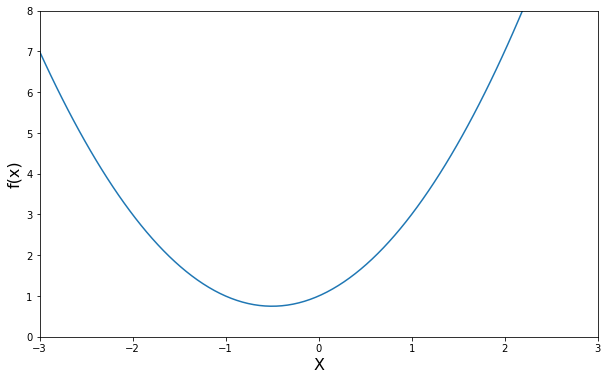

In [7]:
plt.figure(figsize = (10,6))
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)
plt.plot(x_1, y_1)
plt.show()

## Slopes & Derivatives

## $${df(x)}/{dx} = 2*x + 1$$

In [8]:
def df(x):
    return 2*x+1

In [9]:
#Plot


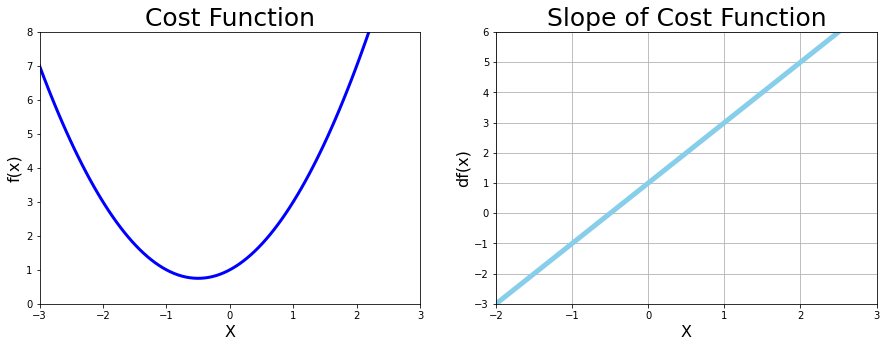

In [10]:
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
plt.title("Cost Function", fontsize = 25)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)
plt.plot(x_1, y_1, color = 'blue', linewidth = 3)

plt.subplot(1,2,2)
plt.title("Slope of Cost Function", fontsize = 25)
plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 5)
plt.grid()
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.xlim([-2,3])
plt.ylim([-3,6])

plt.show()

## Gradient Descent

In [11]:
new_x = -3
previous_x = 0
learnRate = 0.1
precision = 1
count = 0
new_xvalues = []
slopeValues = []
while(precision > 0.00000000000000001): 
    count += 1
    previous_x = new_x;
    gradient = df(previous_x)
    new_xvalues.append(new_x)
    slopeValues.append(gradient)
    new_x = previous_x - learnRate*gradient
    
    
    precision = abs(previous_x - new_x) 
    
    
print('Local min occurs at: ', new_x)
print('Slope or df(x) at this point is: ',df(new_x))
print("No of steps: ", count)
print("f(x) value at this point: ",f(new_x))

Local min occurs at:  -0.5000000000000002
Slope or df(x) at this point is:  -4.440892098500626e-16
No of steps:  166
f(x) value at this point:  0.75


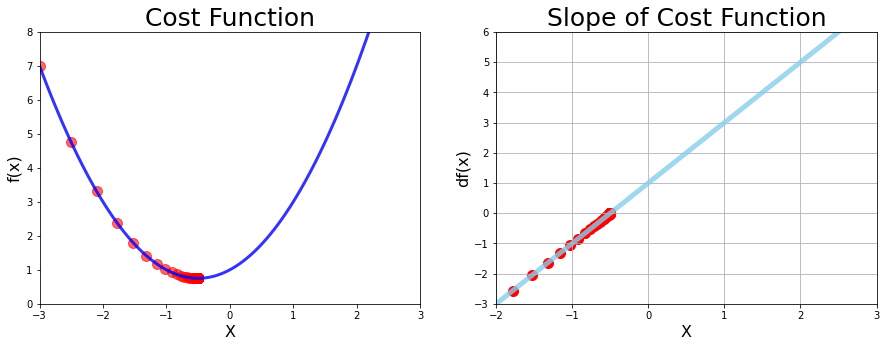

In [12]:
# Implement the gradient descent algorithm

#1 Cost Function
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
plt.title("Cost Function", fontsize = 25)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)
plt.plot(x_1, y_1, color = 'blue', linewidth = 3, alpha = 0.8)

xvalues = np.array(new_xvalues)
plt.scatter(xvalues, f(xvalues), color='red', s = 100, alpha = 0.6)



#2 Derivative
plt.subplot(1,2,2)
plt.title("Slope of Cost Function", fontsize = 25)
plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 5, alpha = 0.8)
plt.grid()
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.xlim([-2,3])
plt.ylim([-3,6])
slope = np.array(slopeValues)
plt.scatter(xvalues, slope, color = 'red', s =100)

plt.show()

## Example 2: Multiple Minima vs Initial Guess

### $$g(x) = x^4 - 4x^2 +5$$

In [13]:
x_2 = np.linspace(-2,2,1000)

In [14]:
x_2

array([-2.        , -1.995996  , -1.99199199, -1.98798799, -1.98398398,
       -1.97997998, -1.97597598, -1.97197197, -1.96796797, -1.96396396,
       -1.95995996, -1.95595596, -1.95195195, -1.94794795, -1.94394394,
       -1.93993994, -1.93593594, -1.93193193, -1.92792793, -1.92392392,
       -1.91991992, -1.91591592, -1.91191191, -1.90790791, -1.9039039 ,
       -1.8998999 , -1.8958959 , -1.89189189, -1.88788789, -1.88388388,
       -1.87987988, -1.87587588, -1.87187187, -1.86786787, -1.86386386,
       -1.85985986, -1.85585586, -1.85185185, -1.84784785, -1.84384384,
       -1.83983984, -1.83583584, -1.83183183, -1.82782783, -1.82382382,
       -1.81981982, -1.81581582, -1.81181181, -1.80780781, -1.8038038 ,
       -1.7997998 , -1.7957958 , -1.79179179, -1.78778779, -1.78378378,
       -1.77977978, -1.77577578, -1.77177177, -1.76776777, -1.76376376,
       -1.75975976, -1.75575576, -1.75175175, -1.74774775, -1.74374374,
       -1.73973974, -1.73573574, -1.73173173, -1.72772773, -1.72

In [15]:
def f2(x):
    return x**4 -4*(x**2) + 5

(-2.0, 2.0)

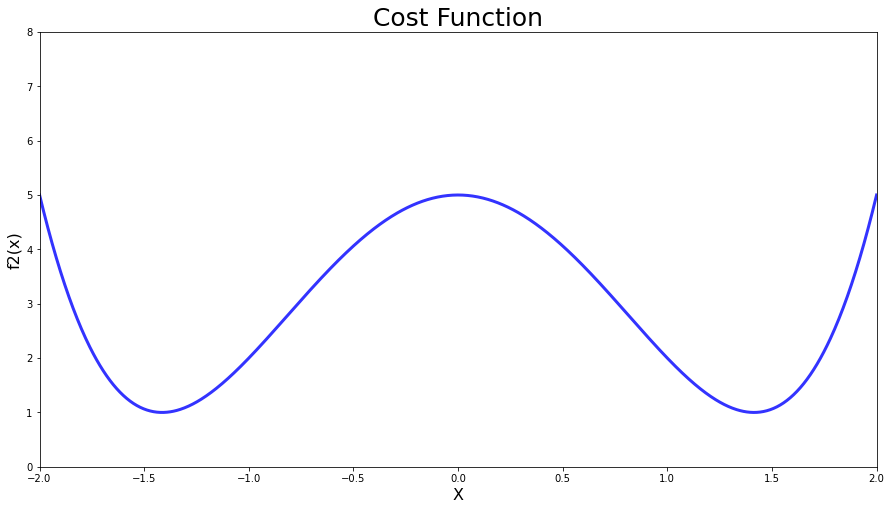

In [16]:
plt.figure(figsize = (15,8))
plt.title("Cost Function", fontsize=25)

plt.xlabel("X", fontsize = 16)
plt.ylabel("f2(x)", fontsize = 16)
plt.plot(x_2, f2(x_2), color = "blue", alpha = 0.8, linewidth=3)
plt.ylim([0,8])
plt.xlim([-2,2])

In [17]:
def df2(x):
    return 4*(x**3) - 8*x

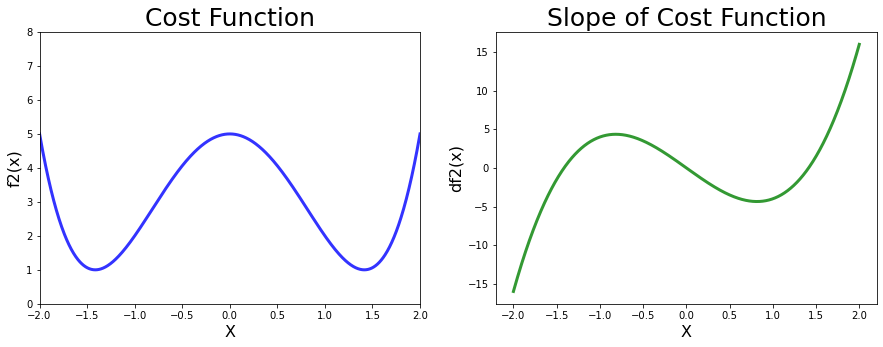

In [18]:
# Plotting Cost Function and slope of cost function

# Cost Function
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Cost Function", fontsize=25)

plt.xlabel("X", fontsize = 16)
plt.ylabel("f2(x)", fontsize = 16)
plt.plot(x_2, f2(x_2), color = "blue", alpha = 0.8, linewidth=3)
plt.ylim([0,8])
plt.xlim([-2,2])

#Slope of CostFunction
plt.subplot(1,2,2)
plt.title("Slope of Cost Function", fontsize=25)

plt.xlabel("X", fontsize = 16)
plt.ylabel("df2(x)", fontsize = 16)
plt.plot(x_2, df2(x_2), color = "green", alpha = 0.8, linewidth=3)

plt.show()

In [340]:
def gradientDescent(initialX, df, learnRate = 0.03, precision = 0.0000000001,
                    max_iter = 300):
    
    new_x = initialX
    xVal = []
    slopeVal = []
    prec = 1
    count = 0
    while(max_iter > count):
        count += 1
        prev_x = new_x;
        gradient = df(prev_x)
        xVal.append(new_x)
        slopeVal.append(gradient)
        new_x = prev_x - learnRate*gradient
        prec = abs(new_x - prev_x)
#         if(count == max_iter):
#             break
        
    valx = np.array(xVal)
    slope = np.array(slopeVal)
    
    return valx, slope, new_x, count

In [341]:
xVal, slopeVal, new_x, steps = gradientDescent(initialX = 0.1,df = df2)


In [342]:
print("Local Minima is at x: ",new_x)
print("Slope at local minima: ", df2(new_x))
print("Value of cost functiona at local minima: ", f2(new_x))
print("No. of steps: ", steps)




Local Minima is at x:  1.414213562373095
Slope at local minima:  -1.7763568394002505e-15
Value of cost functiona at local minima:  1.0000000000000004
No. of steps:  300


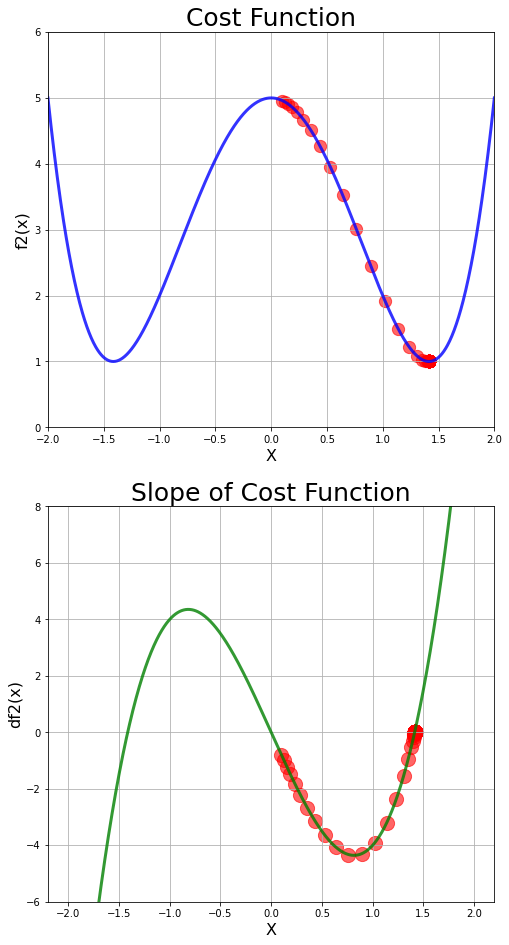

Local Minima is at x:  1.414213562373095
Slope at local minima:  -1.7763568394002505e-15
Value of cost functiona at local minima:  1.0000000000000004
No. of steps:  300


In [343]:
# Plotting the Gradient Descent Algorithm
xVal, slopeVal, new_x, steps = gradientDescent(initialX = 0.1,df = df2)
# Cost Function
plt.figure(figsize = (8,16))

plt.subplot(2,1,1)
plt.title("Cost Function", fontsize=25)

plt.xlabel("X", fontsize = 16)
plt.ylabel("f2(x)", fontsize = 16)
plt.plot(x_2, f2(x_2), color = "blue", alpha = 0.8, linewidth=3)
plt.ylim([0,6])
plt.xlim([-2,2])
plt.grid()
# here it is
plt.scatter(xVal, f2(xVal), color ='red', s = 150, alpha = 0.6)

#Slope of CostFunction
plt.subplot(2,1,2)
plt.title("Slope of Cost Function", fontsize=25)

plt.xlabel("X", fontsize = 16)
plt.ylabel("df2(x)", fontsize = 16)
plt.ylim([-6,8])
plt.grid()
plt.plot(x_2, df2(x_2), color = "green", alpha = 0.8, linewidth=3)
plt.scatter(xVal, slopeVal, color = 'red', s = 200, alpha = 0.6)

plt.show()

print("Local Minima is at x: ",new_x)
print("Slope at local minima: ", df2(new_x))
print("Value of cost functiona at local minima: ", f2(new_x))
print("No. of steps: ", steps)

## Example 3: Divergence and Overflow

### $$h(x) = x^5 -2x^4 + 2$$

In [344]:
x_3 = np.linspace(-2.5, 2.5, num = 1000)

In [345]:
def h(x):
    return x**5 - 2*(x**4) + 2

In [346]:
def dh(x):
    return 5*(x**4) - 8*(x**3)

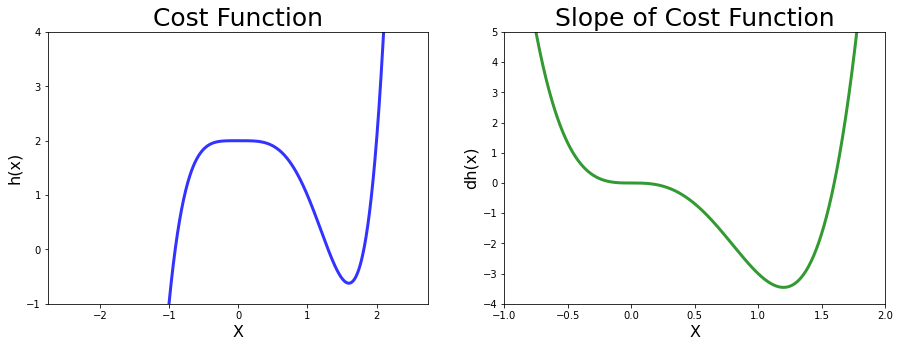

In [347]:
# Plotting Cost Function and slope of cost function

# Cost Function
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Cost Function", fontsize=25)

plt.xlabel("X", fontsize = 16)
plt.ylabel("h(x)", fontsize = 16)
plt.plot(x_3, h(x_3), color = "blue", alpha = 0.8, linewidth=3)
plt.ylim([-1,4])
# plt.xlim([-1.2,2.5])

#Slope of CostFunction
plt.subplot(1,2,2)
plt.title("Slope of Cost Function", fontsize=25)

plt.xlabel("X", fontsize = 16)
plt.ylabel("dh(x)", fontsize = 16)
plt.xlim([-1,2])
plt.ylim([-4,5])
plt.plot(x_3, dh(x_3), color = "green", alpha = 0.8, linewidth=3)

plt.show()

In [348]:
xVal, slopeVal, new_x, steps = gradientDescent(initialX = -0.2 , df = dh, learnRate = 0.02, max_iter = 71)
print("Local Minima is at x: ",new_x)
print("Slope at local minima: ", dh(new_x))
print("Value of cost functiona at local minima: ", h(new_x))
print("No. of steps: ", steps)


Local Minima is at x:  -1.8398461123332792e+24
Slope at local minima:  5.729226632843199e+97
Value of cost functiona at local minima:  -2.1081790694225687e+121
No. of steps:  71


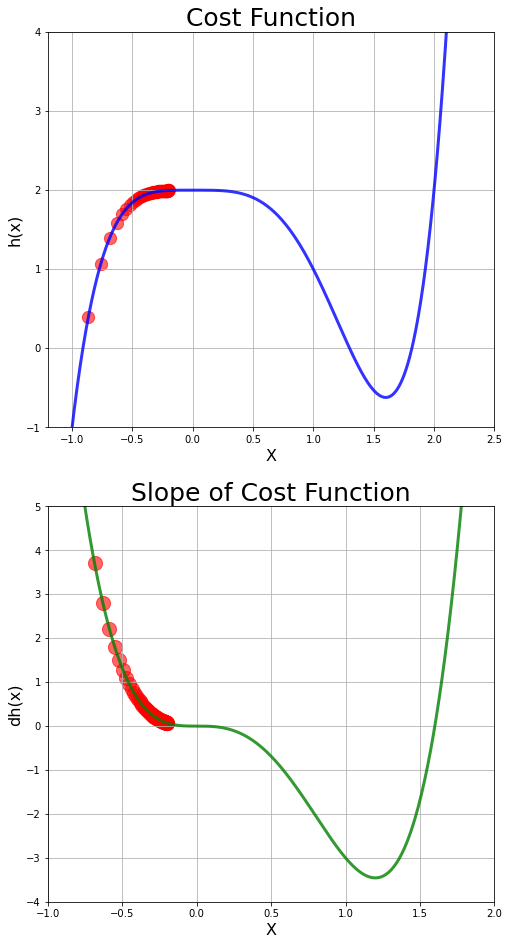

In [349]:
# Plotting the Gradient Descent Algorithm

# Cost Function
plt.figure(figsize = (8,16))

plt.subplot(2,1,1)
plt.title("Cost Function", fontsize=25)

plt.xlabel("X", fontsize = 16)
plt.ylabel("h(x)", fontsize = 16)
plt.plot(x_3, h(x_3), color = "blue", alpha = 0.8, linewidth=3)
plt.ylim(-1,4)
plt.xlim(-1.2,2.5)
plt.grid()
# here it is
plt.scatter(xVal, h(xVal), color ='red', s = 150, alpha = 0.6)

#Slope of CostFunction
plt.subplot(2,1,2)
plt.title("Slope of Cost Function", fontsize=25)

plt.xlabel("X", fontsize = 16)
plt.ylabel("dh(x)", fontsize = 16)
plt.ylim([-4,5])
plt.xlim([-1,2])
plt.grid()
plt.plot(x_3, dh(x_3), color = "green", alpha = 0.8, linewidth=3)
plt.scatter(xVal, slopeVal, color = 'red', s = 200, alpha = 0.6)

plt.show()

# Learning Rate

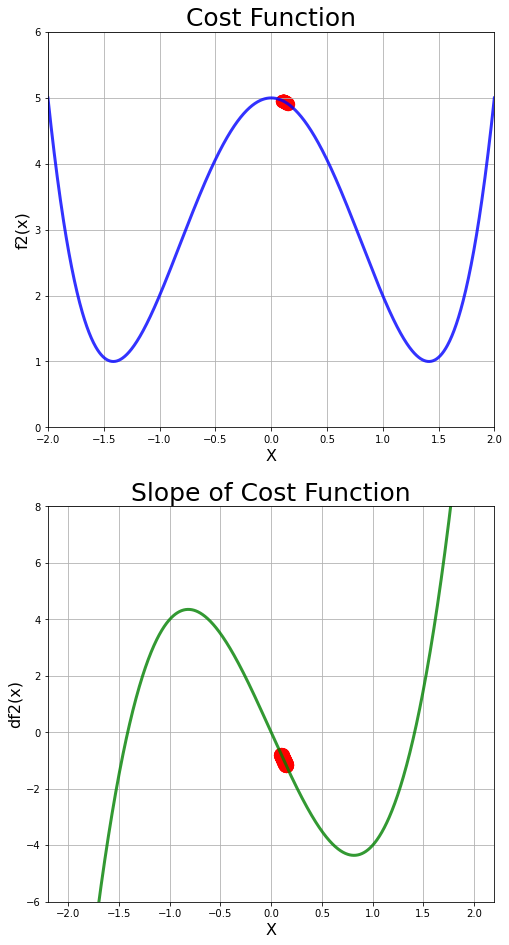

Local Minima is at x:  0.14861285220067325
Slope at local minima:  -1.1757738946654561
Value of cost functiona at local minima:  4.91214466231423
No. of steps:  100


In [350]:
# Plotting the Gradient Descent Algorithm
n = 100
xVal, slopeVal, new_x, steps = gradientDescent(initialX = 0.1,df = df2,
                                               learnRate = 0.0005, max_iter = n)
# Cost Function
plt.figure(figsize = (8,16))

plt.subplot(2,1,1)
plt.title("Cost Function", fontsize=25)

plt.xlabel("X", fontsize = 16)
plt.ylabel("f2(x)", fontsize = 16)
plt.plot(x_2, f2(x_2), color = "blue", alpha = 0.8, linewidth=3)
plt.ylim([0,6])
plt.xlim([-2,2])
plt.grid()
# here it is
plt.scatter(xVal, f2(xVal), color ='red', s = 150, alpha = 0.6)

#Slope of CostFunction
plt.subplot(2,1,2)
plt.title("Slope of Cost Function", fontsize=25)

plt.xlabel("X", fontsize = 16)
plt.ylabel("df2(x)", fontsize = 16)
plt.ylim([-6,8])
plt.grid()
plt.plot(x_2, df2(x_2), color = "green", alpha = 0.8, linewidth=3)
plt.scatter(xVal, slopeVal, color = 'red', s = 200, alpha = 0.6)

plt.show()

print("Local Minima is at x: ",new_x)
print("Slope at local minima: ", df2(new_x))
print("Value of cost functiona at local minima: ", f2(new_x))
print("No. of steps: ", steps)

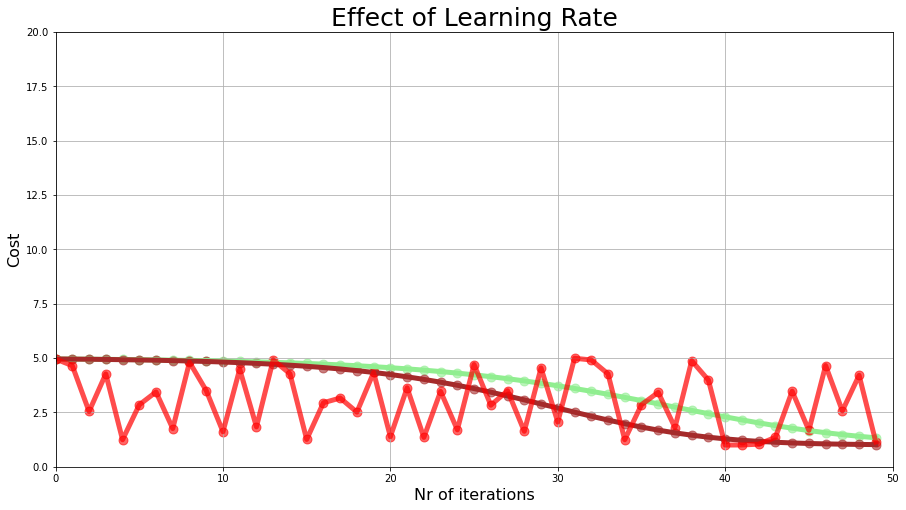

In [360]:
# Plotting Cost Function and slope of cost function
n = 50
lowGamma = gradientDescent(initialX = 0.1,df = df2,
                                      learnRate = 0.008, max_iter = n)

midGamma = gradientDescent(initialX = 0.1,df = df2,
                                      learnRate = 0.01, max_iter = n)

highGamma = gradientDescent(initialX = 0.1,df = df2,
                                      learnRate = 0.25, max_iter = n)
# Cost Function
plt.figure(figsize = (15,8))


plt.title("Effect of Learning Rate", fontsize=25)
plt.xlim(0, n)
plt.ylim(0, 20)

plt.xlabel("Nr of iterations", fontsize = 16)
plt.ylabel("Cost", fontsize = 16)

iterationList = list(range(0,n))
# Plotting Low Learning Rate
plt.plot(iterationList, f2(lowGamma[0]), color = "lightgreen", alpha = 1, linewidth=5)
plt.scatter(iterationList, f2(lowGamma[0]), color ='lightgreen', s = 80, alpha = 0.6)
# Plotting mid Learning Rate
plt.plot(iterationList, f2(midGamma[0]), color = "brown", alpha = 1, linewidth=5)
plt.scatter(iterationList, f2(midGamma[0]), color ='brown', s = 80, alpha = 0.6)
# Plotting high Learning Rate
plt.plot(iterationList, f2(highGamma[0]), color = "red", alpha = 0.7, linewidth=5)
plt.scatter(iterationList, f2(highGamma[0]), color ='red', s = 80, alpha = 0.6)

plt.grid()


plt.show()

# Example 4- Data Viz with 3D charts

### $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$
#### Minimise $$f(x,y) = \frac{1}{r + 1}$$
#### where r is $3^{-x^2 - y^2}$

In [199]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1/(r + 1)

In [216]:
#  Make our data
x_4 = np.linspace(start = -2, stop = 2, num = 200)
y_4 = np.linspace(start = -2, stop = 2, num = 200)

x_4, y_4 = np.meshgrid(x_4, y_4)


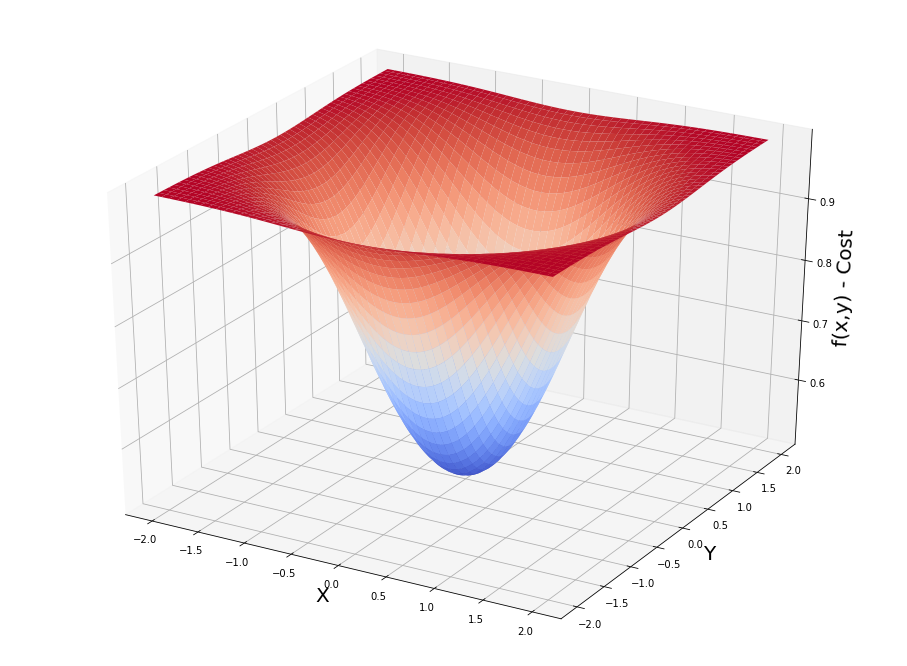

In [225]:
# Generating 3D Plot
fig = plt.figure(figsize = (16,12))
ax = fig.gca(projection = '3d')
ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x,y) - Cost", fontsize = 20)
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.coolwarm)


## Partial Derivatives and SymPy

### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

In [237]:
a,b = symbols('x,y')
print("Cost Function:f(x,y): ", f(a,b))
print("Partial Derivative wrt x is: ", diff(f(a,b),a))
print("Cost Function: f(1.8,1.0)", f(a,b).evalf(subs = {a:1.8,b:1.0}))
print("Partial Derivative: ", diff(f(a,b),a).evalf(subs = {a:1.8,b:1.0}))

Cost Function:f(x,y):  1/(3**(-x**2 - y**2) + 1)
Partial Derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Cost Function: f(1.8,1.0) 0.990604794032582
Partial Derivative:  0.0368089716197505


In [232]:
print("Partial Derivative wrt x is: ", diff(f(a,b),a))

Partial Derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


In [255]:
def pdfx(x , y):
    r = 3**(-x**2 - y**2)
    return (2*x*math.log(3)*r)/(r + 1)**2

In [256]:
def pdfy(x , y):
    r = 3**(-x**2 - y**2)
    return (2*y*math.log(3)*r)/(r + 1)**2

## Batch Gradient Descent with SymPy

In [257]:
# Setup
learnRate = 0.1
max_iter = 500
params = np.array([1.8,1.0]) #initial guess

for n in range(max_iter):
    gradient_x = pdfx(params[0], params[1])
    gradient_y = pdfy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - learnRate*gradients
    

In [258]:
# Results

print("Value of gradient array: ", gradients)
print("Minima occurs at x: ", params[0])
print("Minima occurs at y : ", params[1])
print("The cost is: ", f(params[0], params[1]))


Value of gradient array:  [2.01013038e-11 1.11673910e-11]
Minima occurs at x:  3.458385998858304e-11
Minima occurs at y :  1.9213255549212797e-11
The cost is:  0.5


# Graphing 3D Gradient Descent

In [283]:
# Setup
learnRate = 0.1
max_iter = 500
params = np.array([1.8,1.0]) #initial guess
valuesArray = params.reshape(1,2)
gradients = np.array([[pdfx(params[0], params[1]), 
                       pdfy(params[0], params[1])]]).reshape(1,2)

print(valuesArray)
print(valuesArray.shape)


for n in range(max_iter):
    gradient_x = pdfx(params[0], params[1])
    gradient_y = pdfy(params[0], params[1])
    gradient = np.array([gradient_x, gradient_y])
    gradients = np.append(arr = gradients, values = gradient.reshape(1,2), 
                          axis = 0)
    
    params = params - learnRate*gradient
    valuesArray = np.append(arr = valuesArray, values = params.reshape(1,2),
                            axis = 0)
#   valuesArray = np.concatenate((valuesArray, params.reshape(1,2)), axis = 0)
    
    

[[1.8 1. ]]
(1, 2)


In [284]:
valuesArray

array([[1.80000000e+00, 1.00000000e+00],
       [1.79631910e+00, 9.97955057e-01],
       [1.79257650e+00, 9.95875836e-01],
       ...,
       [3.87209563e-11, 2.15116424e-11],
       [3.65939904e-11, 2.03299946e-11],
       [3.45838600e-11, 1.92132555e-11]])

In [285]:
gradients

array([[3.68089716e-02, 2.04494287e-02],
       [3.68089716e-02, 2.04494287e-02],
       [3.74259851e-02, 2.07922139e-02],
       ...,
       [2.25059234e-11, 1.25032908e-11],
       [2.12696592e-11, 1.18164773e-11],
       [2.01013038e-11, 1.11673910e-11]])

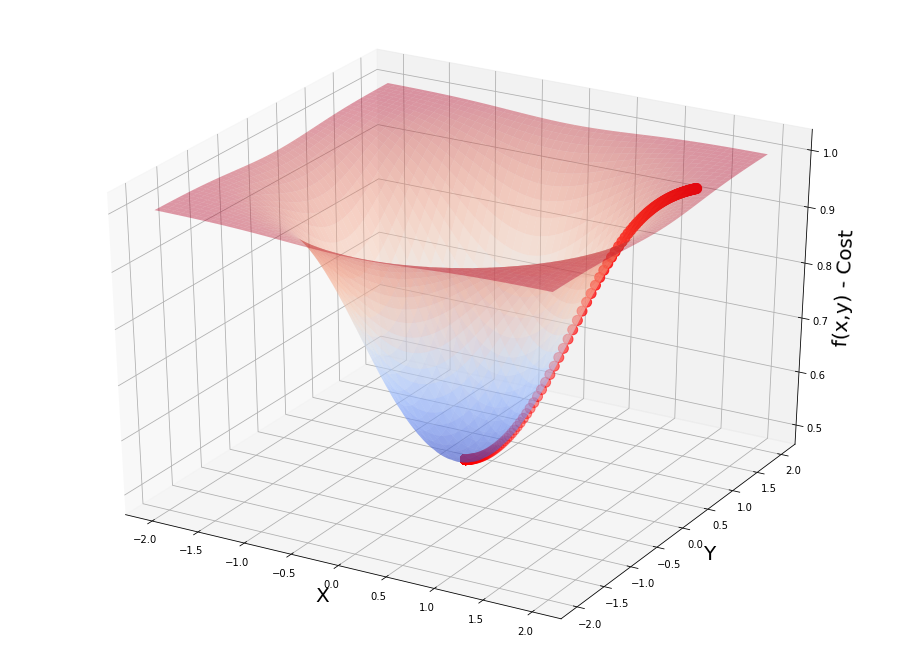

In [282]:
# Generating 3D Plot
fig = plt.figure(figsize = (16,12))
ax = fig.gca(projection = '3d')
ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x,y) - Cost", fontsize = 20)
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.coolwarm, alpha = 0.4)
ax.scatter(valuesArray[:, 0], valuesArray[:,1],
           f(valuesArray[:,0], valuesArray[:,1]), s = 100, color = 'red')

plt.show()


## BiVariate Convex Function

## $$f(x,y) = x^2 + xy + y^2$$

In [313]:
x_5 = np.linspace(start = -2, stop = 2, num = 1000)
y_5 = np.linspace(start = -2, stop = 2, num = 1000)

x_5, y_5 = np.meshgrid(x_5, y_5)


array([[-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-1.995996  , -1.995996  , -1.995996  , ..., -1.995996  ,
        -1.995996  , -1.995996  ],
       [-1.99199199, -1.99199199, -1.99199199, ..., -1.99199199,
        -1.99199199, -1.99199199],
       ...,
       [ 1.99199199,  1.99199199,  1.99199199, ...,  1.99199199,
         1.99199199,  1.99199199],
       [ 1.995996  ,  1.995996  ,  1.995996  , ...,  1.995996  ,
         1.995996  ,  1.995996  ],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]])

In [291]:
def g(x,y):
    return x**2 + x*y + y**2

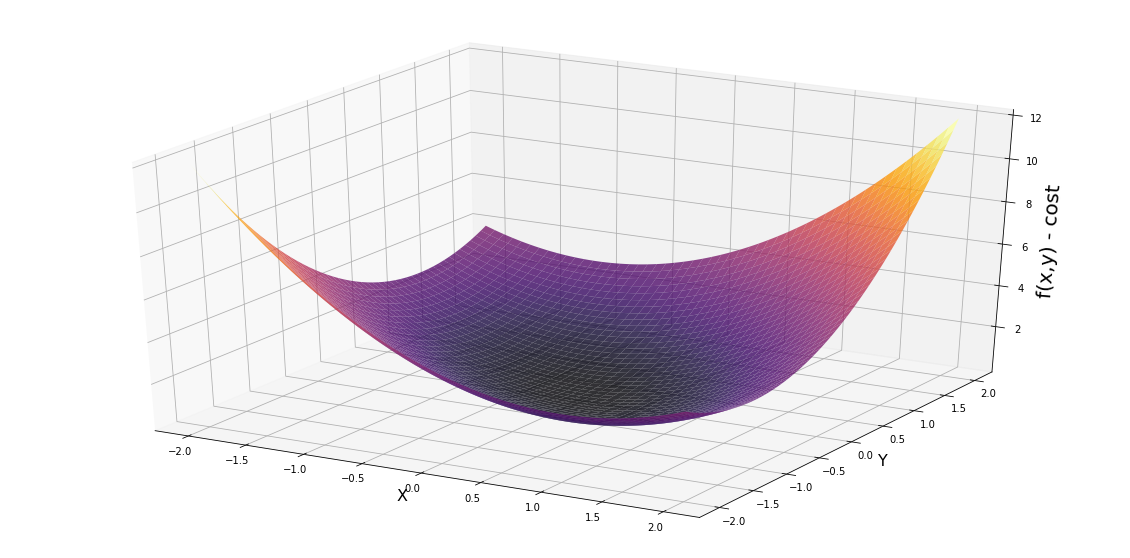

In [295]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca(projection = "3d")
ax.set_xlabel("X", fontsize = 16)
ax.set_ylabel("Y", fontsize = 16)
ax.set_zlabel("f(x,y) - cost", fontsize = 20)
ax.plot_surface(x_5, y_5, g(x_5,y_5), cmap = cm.inferno, alpha = 0.8)
plt.show()


In [299]:
def pdgx(x,y):
    return 2*x + y

def pdgy(x, y):
    return 2*y + x

In [351]:
def gradientDescent3d(initialX = 1, initialY = 1, learnRate = 0.1, max_iter = 300, precision = 0.000001):
    
    params = np.array([initialX, initialY])
    valuesArray = params.reshape(1,2)
    
    for i in range(max_iter):
        gradientX = pdgx(params[0], params[1])
        gradientY = pdgy(params[0], params[1])
        gradient = np.array([gradientX, gradientY])
        
        params = params -  learnRate * gradient
        valuesArray = np.append(arr = valuesArray, values=params.reshape(1,2), axis = 0)
        
        
    return valuesArray, params, gradient
        

In [383]:
values, minvalues, gradient = gradientDescent3d(1.5,1.5,learnRate = 0.3, max_iter = 400)


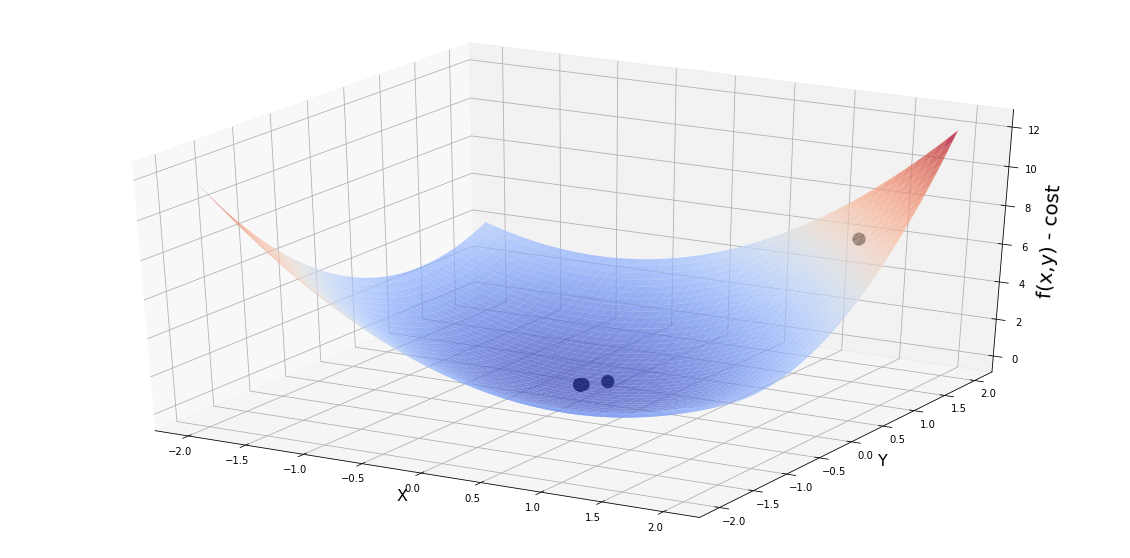

Minima is at (3.458385998858304e-11, 1.9213255549212797e-11)
Minimum value is:  2.2296611003481127e-21
Slope wrt x:  0.0
Slope wrt y:  0.0


In [384]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca(projection = "3d")
ax.set_xlabel("X", fontsize = 16)
ax.set_ylabel("Y", fontsize = 16)
ax.set_zlabel("f(x,y) - cost", fontsize = 20)
ax.plot_surface(x_5, y_5, g(x_5,y_5), cmap = cm.coolwarm, alpha = 0.7)

# Gradient Descent Plot
ax.scatter(values[:,0],values[:,1], g(values[:,0], values[:,1]), color = 'black', s = 150, alpha = 1)
plt.show()


print("Minima is at ({0}, {1})".format(params[0], params[1]) )
print("Minimum value is: ", g(params[0], params[1]))
print("Slope wrt x: ", gradient[0])
print("Slope wrt y: ", gradient[1])

# Example 5 - Working with Data & Real Cost Function
## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n}\big(y^{(i)} - h_\theta x^{(i)} \big)^2$$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n}\big(y^{(i)} - h_\theta x^{(i)} \big)^2$$

### $$MSE = \frac{1}{n}\sum_{i=1}^{n}\big(y^{(i)} - \hat{y} \big)^2$$

In [425]:
#  Sample Data
x_5 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5]).reshape(7,1)
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)

print("Shape of x_5 array:", x_5.shape)
print("Shape of y_5 array:", y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [426]:
regr= LinearRegression()

In [427]:
regr.fit(x_5,y_5)

LinearRegression()

In [428]:
regr.coef_

array([[1.22272646]])

In [429]:
regr.intercept_

array([0.84753515])

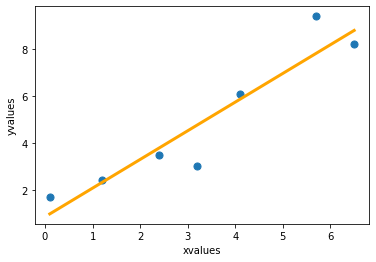

In [430]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color = 'orange', linewidth=3)
plt.xlabel('xvalues')
plt.ylabel('yvalues')
plt.show()

In [431]:
y_hat = regr.coef_[0][0]*x_5 + regr.intercept_
print (" Est values y_hat are:\n",y_hat)
print("Real values of y are:\n",y_5)

 Est values y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Real values of y are:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [432]:
def MSE(y_hat, y):
    return np.average((y_hat - y)**2)

In [433]:
MSE(y_hat, y_5)

0.9479655759794577

# 3D Plot for the MSE Cost Function

In [496]:
numTheta = 200
theta0 = np.linspace(start = -1, stop = 3, num = numTheta)
theta1 = np.linspace(start = -1, stop = 3, num = numTheta)

plot0, plot1 = np.meshgrid(theta0, theta1)

In [497]:
plot0

array([[-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       ...,
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ]])

In [498]:
plot1

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.9798995 , -0.9798995 , -0.9798995 , ..., -0.9798995 ,
        -0.9798995 , -0.9798995 ],
       [-0.95979899, -0.95979899, -0.95979899, ..., -0.95979899,
        -0.95979899, -0.95979899],
       ...,
       [ 2.95979899,  2.95979899,  2.95979899, ...,  2.95979899,
         2.95979899,  2.95979899],
       [ 2.9798995 ,  2.9798995 ,  2.9798995 , ...,  2.9798995 ,
         2.9798995 ,  2.9798995 ],
       [ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ]])

### Calc MSE using nested for loops

In [499]:
plotCost = np.zeros((numTheta,numTheta))

In [500]:
plotCost

for i in range(numTheta):
    for j in range(numTheta):
        y_hat = plot0[i][j] + plot1[i][j]*x_5
        plotCost[i][j] = MSE(y_hat, y_5) 

In [501]:
np.min(plotCost)

0.9483826526747164

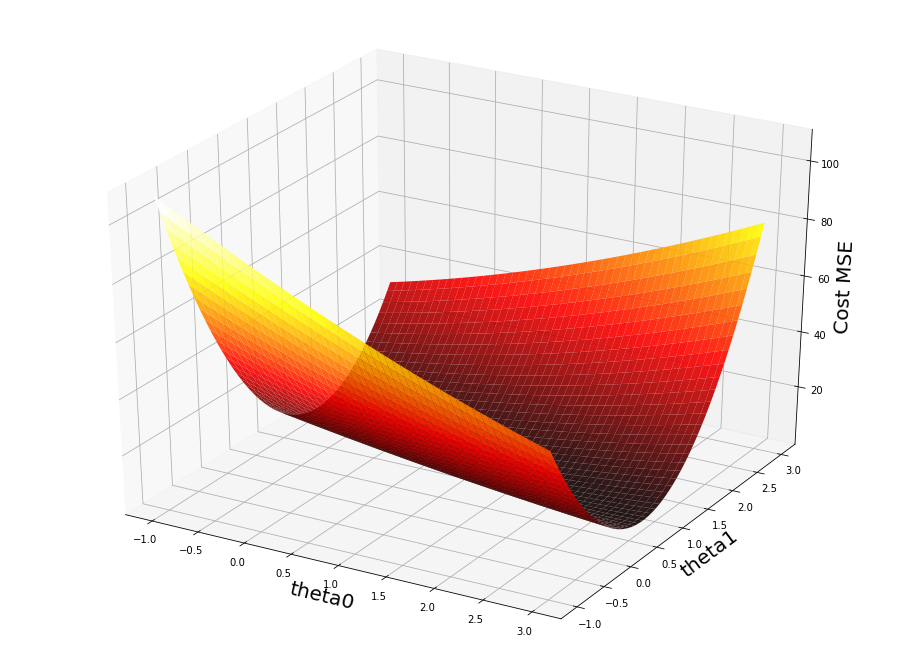

In [502]:
fig = plt.figure(figsize = (16,12))
ax = fig.gca(projection = '3d')
ax.set_xlabel("theta0", fontsize = 20)
ax.set_ylabel("theta1", fontsize = 20)
ax.set_zlabel("Cost MSE", fontsize = 20)
ax.plot_surface(plot0, plot1, plotCost,cmap = cm.hot, alpha = 0.9)
plt.show()


In [503]:
print("Min value of MSE: ", np.min(plotCost))

Min value of MSE:  0.9483826526747164


In [504]:
ijMin = np.unravel_index(indices = plotCost.argmin(), shape=plotCost.shape)

In [505]:
print("theta0 and theta1: ",ijMin)

theta0 and theta1:  (111, 91)


In [506]:
print("optimal theta0: ",plot0[111,91])
print("optimal theta1: ",plot1[111,91])

optimal theta0:  0.829145728643216
optimal theta1:  1.2311557788944723


# Gradient Descent on MSE


### $$MSE = \frac{1}{n} \sum_{i=1}^{n}\big(y - \left(\theta_{0} + \theta_{1}\cdot x^{(i)} \right) \big)^2$$

### $$\frac {\partial \left(MSE\right)}{\partial \theta_{0}} = \frac{-2}{n} \sum_{i=1}^{n}\big(y - \left(\theta_{0} + \theta_{1}\cdot x^{(i)} \right) \big)$$

### $$\frac {\partial \left(MSE\right)}{\partial \theta_{1}} = \frac{-2}{n} \sum_{i=1}^{n}\big(y - \left(\theta_{0} + \theta_{1}\cdot x^{(i)} \right) \big)\left(x^{(i)}\right)$$

In [511]:
# Will return a 

def grad(x, y, thetas):
    n = y.size
    
    theta0Slope = (-2)*(np.average(y - thetas[0] - thetas[1]*x))
    theta1Slope = (-2)*(np.average((y - thetas[0] - thetas[1]*x)*x))
    
    return np.append(arr=theta0Slope, values=theta1Slope)

In [512]:
https://colab.research.google.com/github/google/eng-edu/blob
# /master/ml/cc/exercises/intro_to_fairness.ipynb

In [531]:
learnRate = 0.01
thetas = np.array([2.9, 2.9])
thetas_list = thetas.reshape(1,2)
y0 = thetas[0] + thetas[1]*x_5
costVals = MSE(y0,y_5)

for i in range(1000):
    thetas = thetas - learnRate * grad(x_5, y_5, thetas)
    
    #Append the new values 
    thetas_list = np.append(arr=thetas_list, values=thetas.reshape(1,2), axis=0)
    costVals = np.append(arr=costVals, values=MSE(thetas[0] + thetas[1]*x_5, y_5))
    
    

print("min occurs at theta0: ", thetas[0])
print("Min occurs at theta 1: ", thetas[1])
print("MSE is: ", MSE(thetas[0] + thetas[1]*x_5,y_5))

min occurs at theta0:  0.8532230461743415
Min occurs at theta 1:  1.2214935332607393
MSE is:  0.9479751138321334


In [532]:
thetas_list

array([[2.9       , 2.9       ],
       [2.74777143, 2.2416    ],
       [2.64222994, 1.79833515],
       ...,
       [0.85328766, 1.22147953],
       [0.85325526, 1.22148655],
       [0.85322305, 1.22149353]])

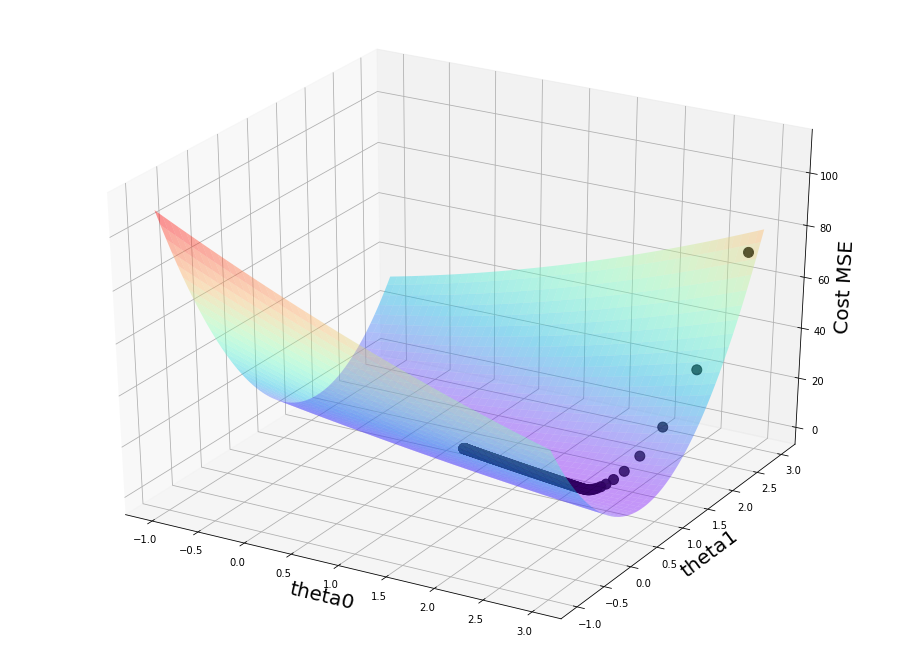

In [533]:
#PLotting MSE
fig = plt.figure(figsize = (16,12))
ax = fig.gca(projection = '3d')


ax.set_xlabel("theta0", fontsize = 20)
ax.set_ylabel("theta1", fontsize = 20)
ax.set_zlabel("Cost MSE", fontsize = 20)

ax.plot_surface(plot0, plot1, plotCost,cmap = cm.rainbow, alpha = 0.4)
ax.scatter(thetas_list[:,0],thetas_list[:,1], costVals, color='black', s = 100)
plt.show()
